In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('Processed_DJI.csv',index_col='Date', parse_dates = True)
df = df.drop('Name', axis = 1)

In [ ]:
df

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,10428.049805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,10583.959961,NaN,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.016043,NaN,...,0.023521,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,10572.019531,NaN,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,...,-0.002515,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,...,-0.000846,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,...,0.006301,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,23461.939453,6.511740,-0.004304,0.000260,0.000374,0.000392,-0.230990,0.261016,1.290420,2.718486,23462.383792,23305.293603,22853.962112,21532.900862,1.05,1.22,1.33,2.01,2.33,0.005984,0.000623,3.60,4.26,-0.004485,0.001459,-0.002633,-0.001988,-0.002043,-0.003310,-0.006461,-0.006864,-0.000102,-0.005558,-0.004792,0.005990,-0.011639,-0.006056,-0.014935,-0.003762,0.007921,...,-0.004528,-0.003638,1.28,1.11,1.00,0.17,0.28,0.66,1.93,2.93,3.04,3.21,0.007407,-0.012121,0.000000,0.01,0.69,-1.17,-0.42,0.63,-1.42,-0.32,0.41,-0.41,0.30,0.61,-0.47,-0.43,0.79,-0.17,-0.24,-0.62,-0.34,-

In [ ]:
# Checking for NAN OR Missing Values
df.isnull().sum()

Close             0
Volume            3
mom               1
mom1              2
mom2              3
                 ..
Dollar index-F    0
Dollar index      0
wheat-F           2
XAG               0
XAU               0
Length: 82, dtype: int64

In [ ]:
data = df.fillna(df.median())

In [ ]:
data

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,10428.049805,-0.673377,0.000535,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.04,0.06,0.20,2.69,3.85,0.000274,0.000000,5.33,6.39,-0.000106,0.000117,-0.000084,-0.000016,0.000865,0.000829,0.000000,0.000169,0.000354,0.000258,0.000194,0.000000,0.000367,0.000416,0.000847,0.000544,0.000394,...,0.000997,0.000517,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,0.000000,0.000000,0.000000,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,10583.959961,-0.673377,0.014951,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,0.000416,0.000847,0.016043,0.000394,...,0.023521,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,10572.019531,-0.673377,-0.001128,0.014951,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,...,-0.002515,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,...,-0.000846,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,...,0.006301,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,23461.939453,6.511740,-0.004304,0.000260,0.000374,0.000392,-0.230990,0.261016,1.290420

In [ ]:
data.head(10)

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,10428.049805,-0.673377,0.000535,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.16875,15933.258788,15911.369569,15986.229431,15822.214111,0.04,0.06,0.20,2.69,3.85,0.000274,0.000000,5.33,6.39,-0.000106,0.000117,-0.000084,-0.000016,0.000865,0.000829,0.000000,0.000169,0.000354,0.000258,0.000194,0.000000,0.000367,0.000416,0.000847,0.000544,0.000394,...,0.000997,0.000517,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,0.000000,0.000000,0.000000,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,10583.959961,-0.673377,0.014951,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.16875,15933.258788,15911.369569,15986.229431,15822.214111,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,0.000416,0.000847,0.016043,0.000394,...,0.023521,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,10572.019531,-0.673377,-0.001128,0.014951,0.000540,0.000538,0.340396,0.596937,0.924413,1.16875,15933.258788,15911.369569,15986.229431,15822.214111,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,...,-0.002515,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,0.000538,0.340396,0.596937,0.924413,1.16875,15933.258788,15911.369569,15986.229431,15822.214111,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,...,-0.000846,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,0.340396,0.596937,0.924413,1.16875,15933.258788,15911.369569,15986.229431,15822.214111,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,...,0.006301,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
2010-01-08,10618.190430,-0.838081,0.001068,0.003138,0.000157,-0.001128,1.823357,0.596937,0.924413,1.16875,15933.258788,15911.369569,15986.229431,15822.214111,0.02,0.05,0.15,2.57,3.83,0.001695,-0.003097,5.32,6.32,0.005656,-0.007817,-0.004062,-0.000044,0.006648,0.027077,0.021538,0.003438,-0.002456,0.006897,-0.009269,-0.004012,0.005054,0.001357,0.003032,0.002882,0.001226,...,0.004034,0.004249,3.81,3.78,3.68,0.03,0.13,1.00,2.49,6.

In [ ]:
# Checking for NAN OR Missing Values
data.isnull().sum()

Close             0
Volume            0
mom               0
mom1              0
mom2              0
                 ..
Dollar index-F    0
Dollar index      0
wheat-F           0
XAG               0
XAU               0
Length: 82, dtype: int64

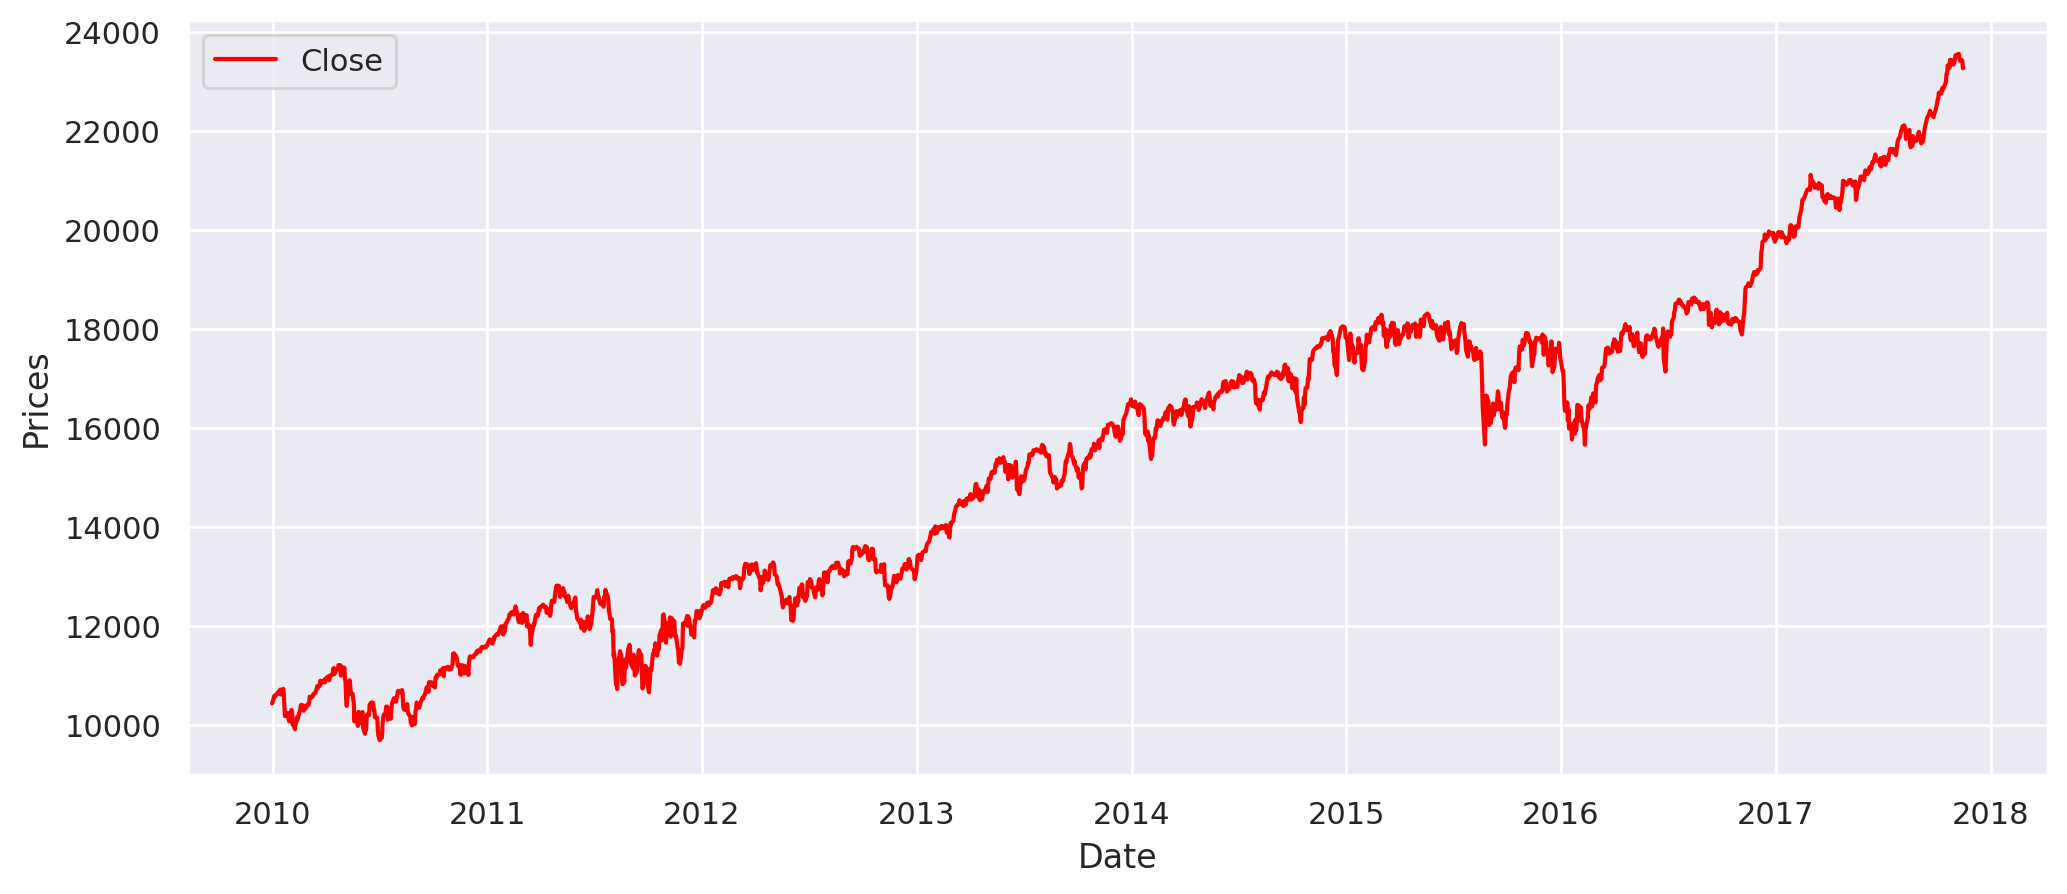

In [ ]:
# Visualizing The Data
plt.figure(figsize=(12, 5), dpi=200)


plt.xlabel('Date')
plt.ylabel('Prices')


plt.plot(data['Close'], label='Close', color='red')

plt.legend()
plt.show()

In [ ]:
# Splitting The Data Into Training, Testing Data
training_data = data[data.index < '2016-04-20']
testing_data = data[data.index >= '2016-04-20']

training_data.shape, testing_data.shape

((1585, 82), (399, 82))

In [ ]:
training_data

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,10428.049805,-0.673377,0.000535,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.04,0.06,0.20,2.69,3.85,0.000274,0.000000,5.33,6.39,-0.000106,0.000117,-0.000084,-0.000016,0.000865,0.000829,0.000000,0.000169,0.000354,0.000258,0.000194,0.000000,0.000367,0.000416,0.000847,0.000544,0.000394,...,0.000997,0.000517,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,0.000000,0.000000,0.000000,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,10583.959961,-0.673377,0.014951,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,0.000416,0.000847,0.016043,0.000394,...,0.023521,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,10572.019531,-0.673377,-0.001128,0.014951,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,...,-0.002515,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,0.000538,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,...,-0.000846,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,0.340396,0.596937,0.924413,1.168750,15933.258788,15911.369569,15986.229431,15822.214111,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,...,0.006301,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-13,17908.279297,-0.102800,0.010554,0.009389,-0.001169,0.001995,1.085053,1.081576,1.852454

In [ ]:
testing_data

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-20,18096.269531,-23.600606,0.002364,0.002746,0.005962,-0.001616,1.049739,2.146182,2.142669,2.921639,17890.200444,17727.869420,17369.240419,17196.111863,0.18,0.23,0.35,1.32,1.85,0.045010,-0.002708,3.57,4.78,-0.003513,0.005474,-0.003993,0.001970,0.002058,0.008106,0.000000,0.007987,0.014529,-0.014187,0.011427,0.006844,0.005571,0.000765,0.006928,0.000762,-0.009325,...,0.001807,0.000997,1.67,1.62,1.50,0.05,0.17,1.21,2.93,4.43,4.55,4.60,0.000000,0.038961,0.047619,-0.24,4.02,0.57,0.85,3.77,0.89,0.42,-0.54,0.21,0.09,-0.76,-0.38,0.20,-0.91,0.00,-0.94,0.94,0.19,0.20,1.06,0.55,0.54,3.60,0.12,-0.52
2016-04-21,17982.519531,-1.033994,-0.006286,0.002364,0.002746,0.005962,0.312889,2.511456,1.681810,2.742050,17906.985733,17752.121811,17393.290580,17203.936815,0.19,0.23,0.36,1.35,1.88,0.010768,-0.002196,3.57,4.79,-0.001117,-0.003651,0.006231,0.001718,-0.010828,-0.003144,-0.005457,-0.000088,-0.009963,0.003418,-0.007929,-0.000115,-0.001980,-0.004508,0.001386,-0.005194,0.018174,...,-0.005708,-0.006931,1.69,1.65,1.52,0.04,0.17,1.22,2.91,4.43,4.56,4.60,0.027778,0.025000,0.022727,-0.72,-2.77,-0.20,0.45,1.29,0.11,-0.77,-0.08,-0.45,-0.28,1.52,0.79,-0.84,-0.05,3.20,-0.95,1.41,-0.64,-0.73,0.33,0.11,0.12,-1.42,0.24,0.39
2016-04-22,18003.750000,-15.300853,0.001181,-0.006286,0.002364,0.002746,0.593878,2.428116,1.185876,2.786179,17924.579236,17776.086401,17417.230165,17211.895155,0.19,0.23,0.37,1.37,1.89,-0.009727,-0.004803,3.59,4.78,-0.000106,0.000117,-0.000084,-0.000016,-0.002737,-0.016640,-0.007101,-0.002201,0.005818,-0.071710,0.011389,0.008526,-0.002874,-0.011126,-0.005964,0.000048,-0.007178,...,0.009615,0.005374,1.70,1.66,1.52,0.04,0.18,1.19,2.89,4.41,4.55,4.59,0.027027,0.024390,0.014815,-0.39,1.30,-0.24,0.75,1.27,-0.84,0.10,-0.49,-1.43,-3.28,-0.52,-0.48,-0.71,3.48,0.92,-0.85,-1.11,1.10,0.16,0.34,0.54,0.55,-5.77,-0.24,-1.33
2016-04-25,17977.240234,-1.198861,-0.001472,0.001181,-0.006286,0.002364,-0.149521,2.397017,1.354458,2.519759,17934.153963,17795.243909,17439.191344,17219.510529,0.16,0.25,0.40,1.38,1.91,-0.025491,-0.003499,3.62,4.79,-0.000106,0.000117,-0.000084,-0.000016,-0.005677,0.009186,-0.002601,0.001677,-0.005784,0.006373,-0.002173,-0.002285,-0.005151,-0.007844,-0.007629,-0.001812,-0.007574,...,-0.007491,-0.004314,1.75,1.66,1.51,0.09,0.24,1.17,2.88,4.39,4.54,4.63,0.052632,0.011905,0.007299,0.09,-1.40,-0.51,-0.44,-2.49,-0.64,-0.08,0.30,-0.65,2.55,-0.88,-0.08,0.15,-3.60,-0.68,0.03,0.11,-0.78,-0.13,-0.37,-0.29,-0.29,2.03,0.24,0.45
2016-04-26,17990.320313,-0.425596,0.000728,-0.001472,0.001181,-0.006286,-0.350508,1.518348,2.198449,2.025797,17944.366026,17813.822614,17460.804245,17227.180278,0.19,0.24,0.42,1.40,1.94,0.020398,0.002260,3.65,4.79,0.005977,0.000846,-0.005286,0.000077,-0.006947,-0.014883,0.007171,-0.005286,0.005189,-0.012857,0.008117,0.003435,-0.002846,0.003769,-0.003377,0.001873,0.004827,...,0.011097,0.005440,1.75,1.70,1.52,0.05,0.23,1.14,2.85,4.37,4.55,4.60,0.075000,0.011765,0.014493,0.43,2.83,-0.09,-0.49,3.28,-0.27,0.09,0.28,0.47,0.26,0.47,0.28,-0.44,-1.50,-0.86,0.69,0.59,1.17,0.25,-0.14,-0.27,-0.28,2.41,1.00,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,23461.939453,6.511740,-0.004304,0.000260,0.0003

In [ ]:
# Normalizing The Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)

scaled_training_data

array([[0.08596998, 0.6191131 , 0.57216966, ..., 0.45271716, 0.67985612,
        0.69756481],
       [0.10404461, 0.6191131 , 0.71946056, ..., 0.6067608 , 0.86536485,
        0.83189317],
       [0.10266036, 0.6191131 , 0.55517186, ..., 0.4347454 , 0.73741007,
        0.65750196],
       ...,
       [0.95189729, 0.62064463, 0.55018761, ..., 0.48951647, 0.69013361,
        0.709348  ],
       [0.9642669 , 0.61908616, 0.62761226, ..., 0.58707745, 0.66135663,
        0.6512176 ],
       [0.96999841, 0.61924785, 0.59475601, ..., 0.59092854, 0.88900308,
        0.78790259]])

In [ ]:
# Spitting The Data Into X_train, y_train with 60 timestamp
X_train = []
y_train = []

for i in range(60, scaled_training_data.shape[0]-60):
    X_train.append(scaled_training_data[i-60:i])
    y_train.append(scaled_training_data[i,[0, 3]])

In [ ]:
# Converting Lists Into Numpy Arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((1465, 60, 82), (1465, 2))

Building the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 82)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 2))

In [ ]:
model.compile(optimizer = Adam(), loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            26600     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1

In [ ]:
# Train The Model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
37/37 [==============================] - 8s 134ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 2/100
37/37 [==============================] - 4s 104ms/step - loss: 0.0082 - val_loss: 0.0097
Epoch 3/100
37/37 [==============================] - 4s 102ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 4/100
37/37 [==============================] - 4s 104ms/step - loss: 0.0080 - val_loss: 0.0067
Epoch 5/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0078 - val_loss: 0.0093
Epoch 6/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 7/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 8/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 9/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 10/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0073 - val_lo

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,val_loss
0,0.047421,0.009798
1,0.011903,0.013372
2,0.011373,0.006759
3,0.009926,0.006495
4,0.010043,0.008113


Text(0, 0.5, 'Loss')

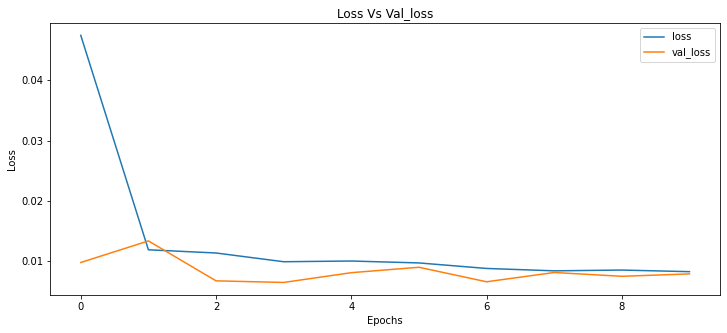

In [ ]:
# Visualizing The Loss vs Val_loss
metrics[['loss','val_loss']].plot(figsize=(12, 5))
plt.title("Loss Vs Val_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
# Saving The Model
model.save('Processed_DJI_Model1.h5')

Test Data Preprocessing

In [ ]:
# Get past 60 days data from the training data
past_60_days_data = training_data.tail(60)

In [ ]:
# Create The New Testing DataFrame
new_testing_data = past_60_days_data.append(testing_data)
new_testing_data.shape

(459, 82)

In [ ]:
# Normalizing The Data
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

array([[0.71861857, 0.63306638, 0.43445939, ..., 0.52503209, 0.74152107,
        0.73684211],
       [0.75131202, 0.61897928, 0.74808981, ..., 0.50877193, 0.75847893,
        0.75569521],
       [0.72548628, 0.62205814, 0.42591093, ..., 0.39623449, 0.65724563,
        0.70227808],
       ...,
       [1.59440784, 0.59065104, 0.57432774, ..., 0.39409499, 0.70709147,
        0.67949725],
       [1.59090345, 0.61879865, 0.55352209, ..., 0.51604621, 0.66495375,
        0.68578162],
       [1.57488295, 0.6209991 , 0.5063828 , ..., 0.38596491, 0.65313464,
        0.65828751]])

In [ ]:
# Splitting The Test Data Into X_test, y_test
X_test = []
y_test = []

for i in range(60, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-60:i])
    y_test.append(scaled_testing_data[i,[0,3]])

In [ ]:
# Converting Lists Into Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((399, 60, 82), (399, 2))

In [ ]:
# Evaluate The Model
loss = model.evaluate(X_test, y_test)
loss

13/13 [==============================] - 0s 25ms/step - loss: 0.0774


0.07736527919769287

Predictions

In [ ]:
# Load The Model
model = keras.models.load_model('Processed_DJI_Model1.h5')

In [ ]:
# Make Predictions
predictions = model.predict(X_test)

In [ ]:
# Find The Mean Squared Error
mean_error = mean_squared_error(y_test, predictions)

mean_error

0.07736528488367285

In [ ]:
# Check Scale
scaler.scale_

array([1.15929795e-04, 4.40082908e-04, 1.02174675e+01, 1.02174675e+01,
       1.02174675e+01, 1.02174675e+01, 5.49388809e-02, 4.41696855e-02,
       3.76784775e-02, 3.71845577e-02, 1.20645917e-04, 1.23601495e-04,
       1.28335673e-04, 1.39201526e-04, 2.63157895e+00, 2.70270270e+00,
       1.75438596e+00, 3.63636364e-01, 2.49376559e-01, 4.44833947e+00,
       9.52764555e-01, 1.82149362e-01, 1.53609831e-01, 2.47790961e+01,
       1.43548287e+01, 2.19844102e+01, 3.28741699e+01, 4.71033086e+00,
       3.52081231e+00, 5.76501841e+00, 1.15585275e+01, 5.60121737e+00,
       4.57628585e+00, 5.84383039e+00, 8.54399961e+00, 6.46494658e+00,
       1.01746323e+01, 8.64583342e+00, 8.76875215e+00, 7.57391756e+00,
       8.20078910e+00, 6.79489266e+00, 6.30791994e+00, 8.12928885e+00,
       2.59740260e-01, 2.61096606e-01, 2.67379679e-01, 2.50000000e+00,
       1.66666667e+00, 6.49350649e-01, 1.67504188e-01, 1.57977883e-01,
       1.56006240e-01, 1.55279503e-01, 4.00000000e-01, 7.65957447e-01,
      

In [ ]:
predictions

array([[0.80127084, 0.59603304],
       [0.8043946 , 0.5960673 ],
       [0.807469  , 0.59597063],
       [0.81041765, 0.5959996 ],
       [0.81341934, 0.59581614],
       [0.81584954, 0.59552854],
       [0.818274  , 0.59520614],
       [0.8194306 , 0.5945899 ],
       [0.81872356, 0.5940249 ],
       [0.8185983 , 0.5940417 ],
       [0.8189078 , 0.5937374 ],
       [0.81865585, 0.59324   ],
       [0.8180659 , 0.59313965],
       [0.8181219 , 0.5931825 ],
       [0.8194745 , 0.59310114],
       [0.8218362 , 0.59329444],
       [0.8232459 , 0.5934633 ],
       [0.8240742 , 0.5935937 ],
       [0.8235941 , 0.59379745],
       [0.8225433 , 0.5941442 ],
       [0.82003355, 0.5944519 ],
       [0.81725335, 0.5947828 ],
       [0.8141646 , 0.59506744],
       [0.81127757, 0.5953717 ],
       [0.80785704, 0.5954778 ],
       [0.80571765, 0.59568036],
       [0.8047193 , 0.59605306],
       [0.804776  , 0.5959976 ],
       [0.80558586, 0.5959595 ],
       [0.80617523, 0.59587264],
       [0.

In [ ]:
scale_close = 1/5.00575662e-03

# Unscaling The Predictions
predicted_close = predictions[:, 1]
predicted_close = predicted_close * scale_close

In [ ]:
# Unscaling the y_test
actual_close = y_test[:, 1]
actual_close = actual_close * scale_close

In [ ]:
# Create The DataFrame For Actual_Close VS Predicted_Close
new_close_df = pd.DataFrame({"Actual Close": actual_close, "Predicted Close": predicted_close})
new_close_df.head()

,Actual Close,Predicted Close
0,118.814408,119.069519
1,118.033695,119.076370
2,100.379152,119.057053
3,115.619234,119.062843
4,110.203927,119.026192


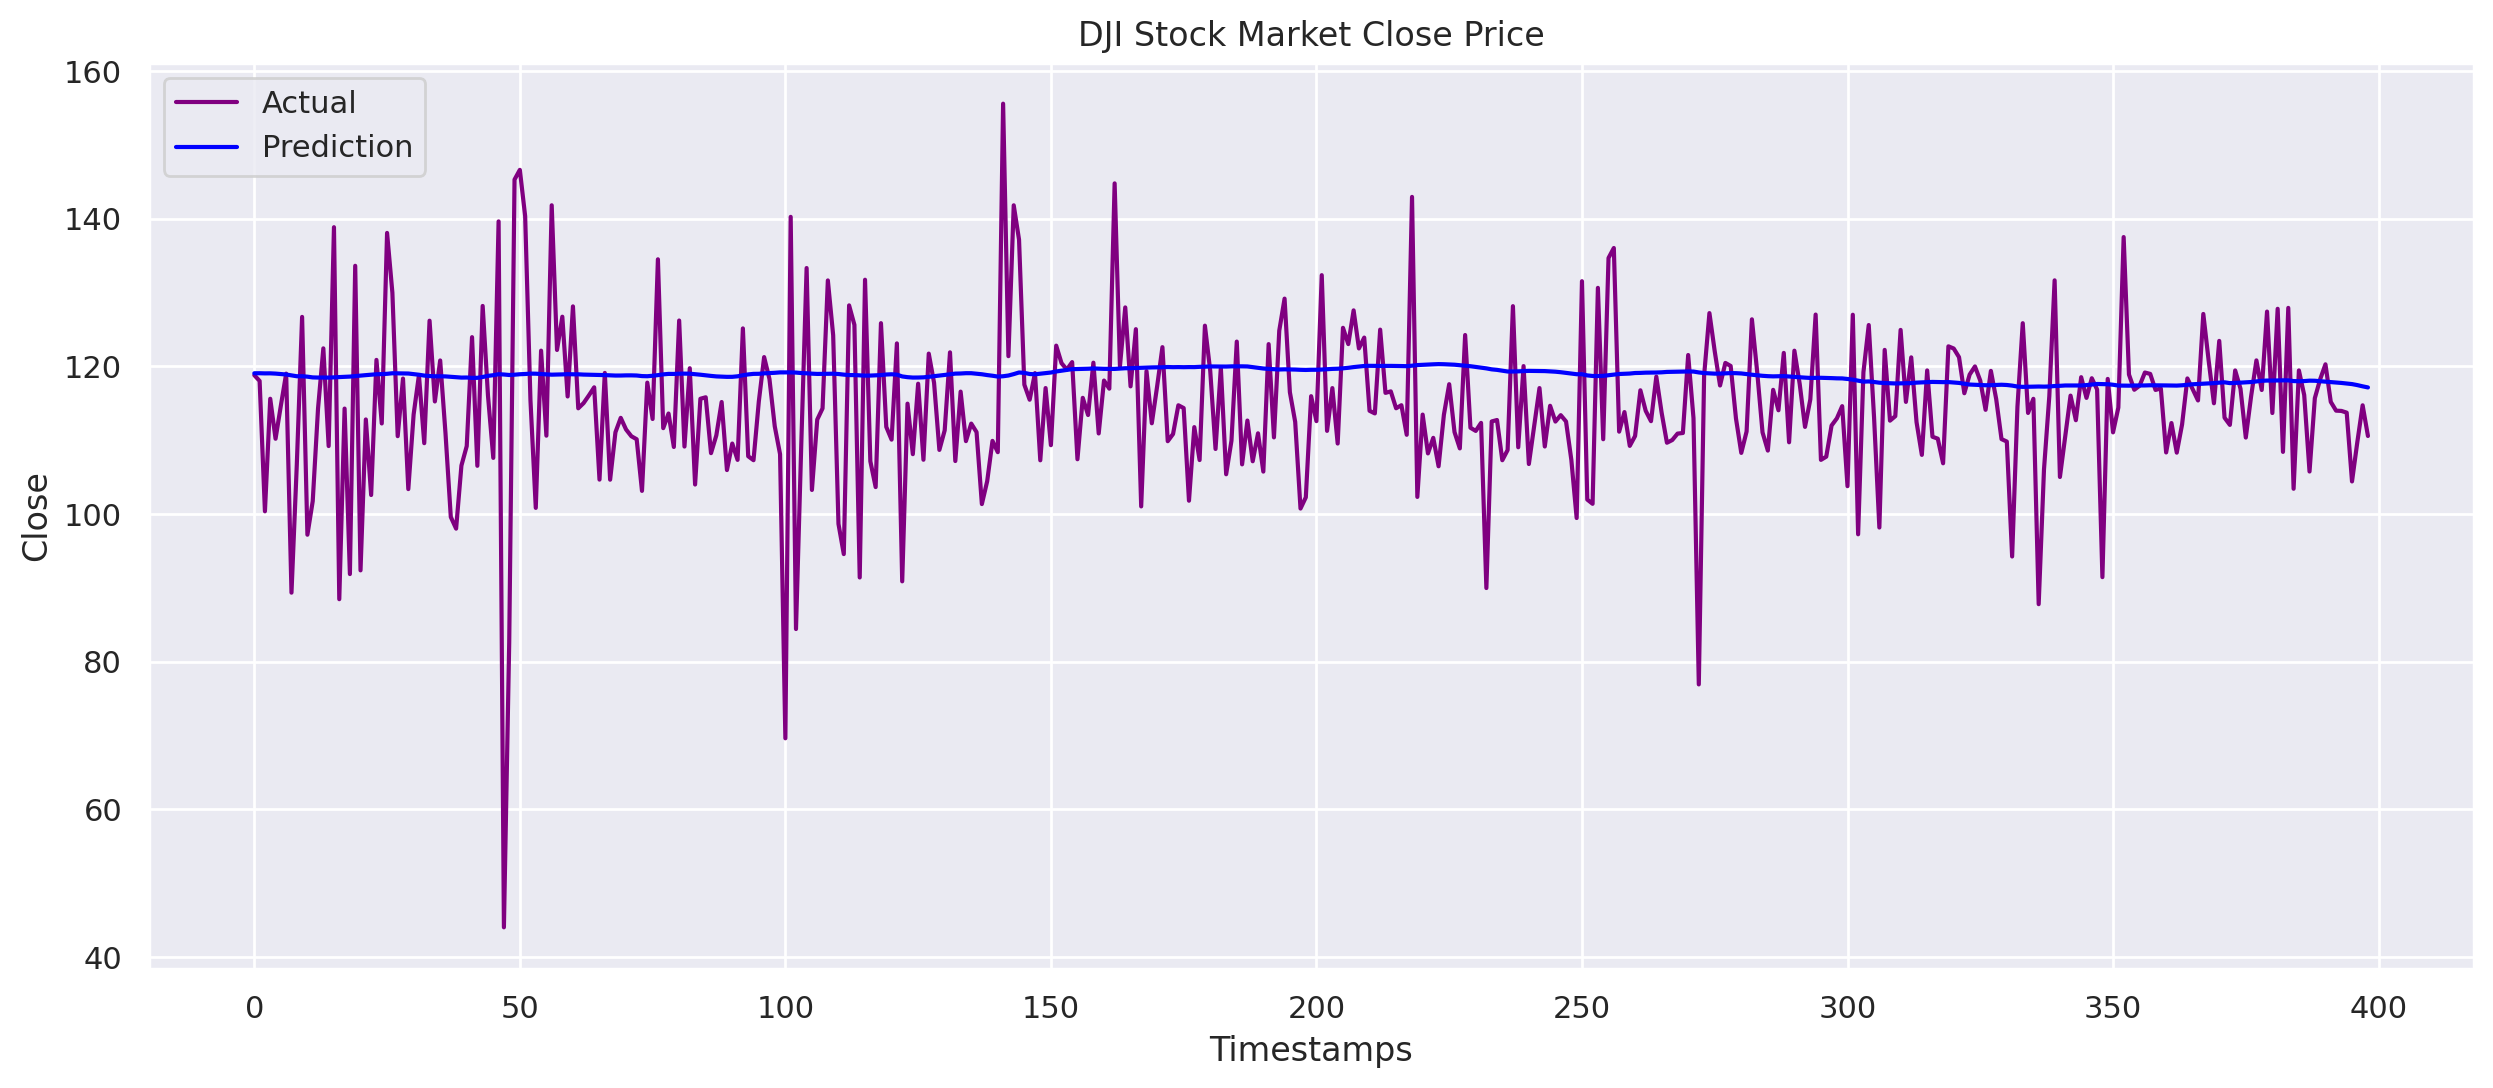

In [ ]:
# Visualizing The Close Prices
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6), dpi=200)
plt.title("DJI Stock Market Close Price")
plt.xlabel('Timestamps')
plt.ylabel('Close')
plt.plot(new_close_df['Actual Close'], color='purple')
plt.plot(new_close_df['Predicted Close'], color='blue')
plt.legend(['Actual', 'Prediction'], loc='upper left')
plt.show()